In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [115]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/gdrive/MyDrive/ABD/Z2/site_data.csv')
df

,day,views,regs
0,5,5252,21
1,6,7620,46
2,7,941,9
3,8,1159,8
4,9,485,3
5,10,299,6
6,11,239,4
7,12,195,2
8,13,181,2
9,14,180,2


In [116]:
days = np.array('day')
views = np.array(df['views'])
download = np.array(df['regs'])
N, _ = df.shape
N

10

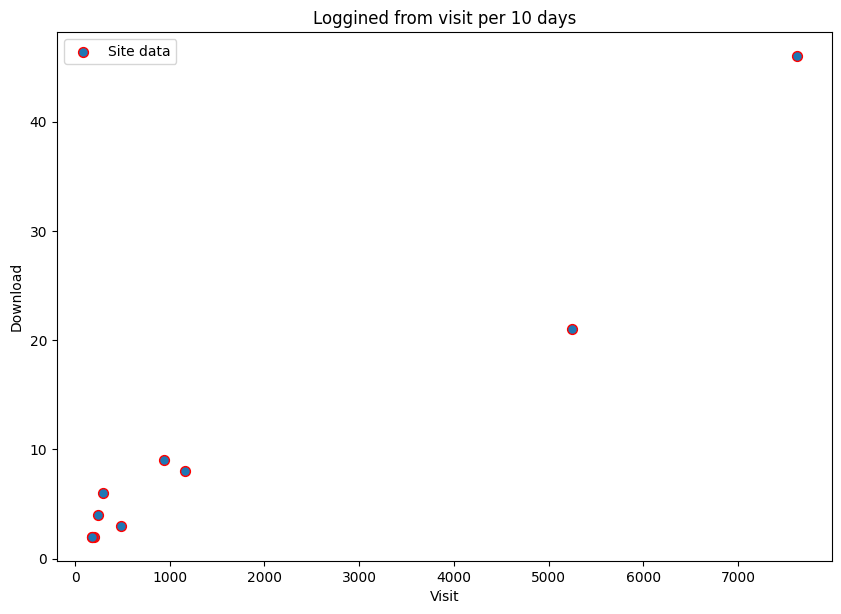

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(views, download, edgecolor="red", s=50,cmap='coolwarm',label="Site data")
plt.ylabel("Download")
plt.xlabel("Visit")
plt.title("Loggined from visit per 10 days")
plt.legend()
plt.show()

## С помощью формул

In [122]:
def directFunc(x):
    return x
    
def squareFunc(x):
    return x*x

def coef(x, y):
    a = calculateA(x, y)
    b = calculateB(x, y, a)
    return (a,b)
    
def avg(x, func):
    sum = summ(x,func)
    return sum/len(x)

def summ(x, func):
    sum =0;
    for i in range(0, len(x)):
        sum+=func(x[i])
    return sum

def arrMultSum(x,y):
    if(len(x) != len(y)):
        raise RuntimeError('Failed to open') from exc
        
    sum=0
    for i in range(len(x)):
        sum += x[i]*y[i]
    return sum

def calculateA(x, y):
    numerator = avg(x, directFunc)*avg(y, directFunc) - (arrMultSum(x,y) * 1/len(x))
    denumerator = avg(x, directFunc)**2 - avg(x, squareFunc) 
    return numerator/denumerator

def calculateB(x,y,A):
    mx = avg(x, directFunc)
    my = avg(y, directFunc)
    return my - A * mx

In [123]:
t1 = time.perf_counter()

coefNp = coef(views, download)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

time taken to run: 0.00031976100035535637


In [124]:
print("Coefficient a =", coefNp[0])
print("Coefficient b =", coefNp[1])

Coefficient a = 0.005140311311538676
Coefficient b = 1.7922707482723386


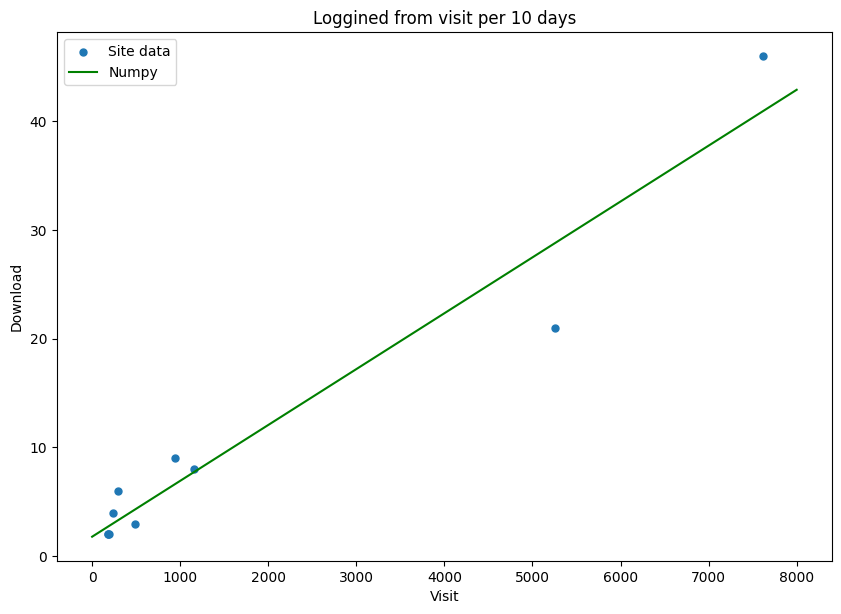

In [166]:
def getLinerPoints(x_data, coefs):
    arrY =[]
    for i in range(len(x_data)):
        arrY += [coefs[0] * x_data[i] + coefs[1]]
    return (x_data, arrY)

def drawLinearRegAndData(data, line_data):
    plt.figure(figsize=(10, 7), dpi=100)
    plt.scatter(data[0], data[1], s=25, cmap='cool',label="Site data")
    plt.plot(line_data[0], line_data[1], "g", label="Numpy")
    plt.ylabel("Download")
    plt.xlabel("Visit")
    plt.title("Loggined from visit per 10 days")
    plt.legend()
    plt.show()
    
line_data = getLinerPoints([0, 8000], [A, B])
drawLinearRegAndData((views, download), line_data)

## Нормальное уравнение


In [162]:
t1 = time.perf_counter()

X_ = np.c_[np.ones((10, 1)), views]  # добавляет x0 = 1 к каждому образцу
print(X_[:5])
theta_best = np.linalg.inv(X_.T.dot(X_))\
              .dot(X_.T)\
              .dot(download)
y_predict = X_.dot(theta_best)

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

[[1.000e+00 5.252e+03]
 [1.000e+00 7.620e+03]
 [1.000e+00 9.410e+02]
 [1.000e+00 1.159e+03]
 [1.000e+00 4.850e+02]]
time taken to run: 0.010700598999392241


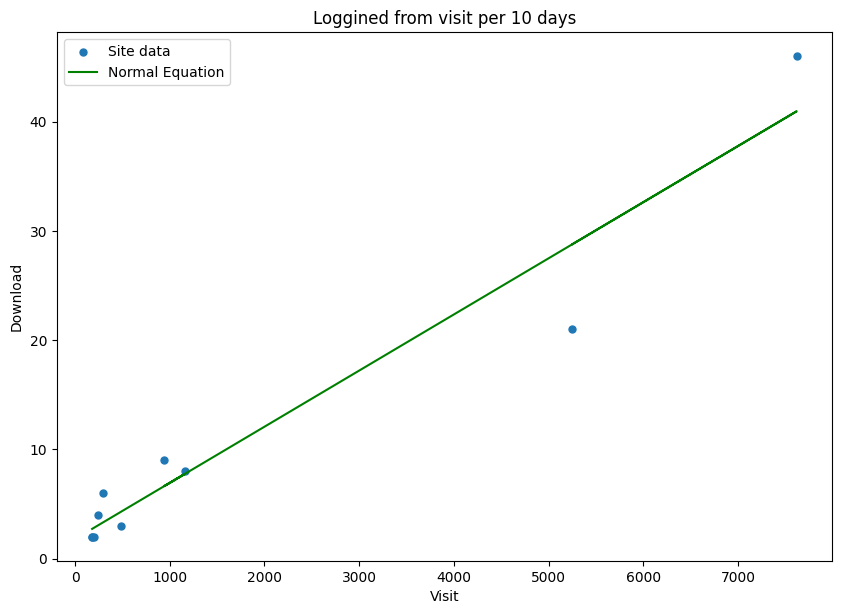

In [163]:
def drawLinearRegAndData(data, y_predict):
    plt.figure(figsize=(10, 7), dpi=100)
    plt.scatter(data[0], data[1], s=25, cmap='cool',label="Site data")
    plt.plot(data[0], y_predict, "g", label="Normal Equation")
    plt.ylabel("Download")
    plt.xlabel("Visit")
    plt.title("Loggined from visit per 10 days")
    plt.legend()
    plt.show()

drawLinearRegAndData((views, download), y_predict)

## Встроенные средства Scikit-Learn


In [126]:
from sklearn.linear_model import LinearRegression

t1 = time.perf_counter()

visit_lin = views[:, np.newaxis]
download_lin = download[:, np.newaxis]

linear_regressor = LinearRegression() 
linear_regressor.fit(visit_lin, download_lin)  

coefSl = [linear_regressor.coef_[0][0], linear_regressor.intercept_[0]]

print("Coefficient a =", coefSl[0])
print("Coefficient b =", coefSl[1])

t2 = time.perf_counter()
print('time taken to run:',t2-t1)

Coefficient a = 0.005140311311538676
Coefficient b = 1.7922707482723386
time taken to run: 0.011003403000358958


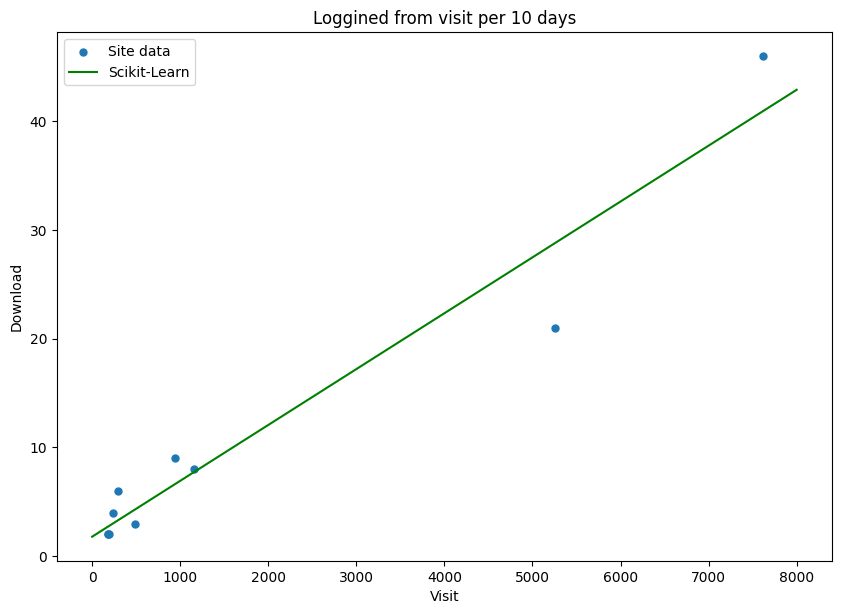

In [167]:
def getLinerPoints(x_data, coefs):
    arrY =[]
    for i in range(len(x_data)):
        arrY += [coefs[0] * x_data[i] + coefs[1]]
    return (x_data, arrY)

def drawLinearRegAndData(data, line_data):
    plt.figure(figsize=(10, 7), dpi=100)
    plt.scatter(data[0], data[1], s=25, cmap='cool',label="Site data")
    plt.plot(line_data[0], line_data[1], "g", label="Scikit-Learn")
    plt.ylabel("Download")
    plt.xlabel("Visit")
    plt.title("Loggined from visit per 10 days")
    plt.legend()
    plt.show()
    
line_data = getLinerPoints([0, 8000], coefSl)
drawLinearRegAndData((views, download), line_data)